In [283]:
#Loading Dataset
import pandas as pd

df = pd.read_csv('https://raw.githubusercontent.com/baljinderxd/ML_Assignments/master/Datasets/movies.csv')
df

,Film,Genre,Lead Studio,Audience score %,Profitability,Rotten Tomatoes %,Worldwide Gross,Year
0,Zack and Miri Make a Porno,Romance,The Weinstein Company,70,1.747542,64,$41.94,2008
1,Youth in Revolt,Comedy,The Weinstein Company,52,1.090000,68,$19.62,2010
2,You Will Meet a Tall Dark Stranger,Comedy,Independent,35,1.211818,43,$26.66,2010
3,When in Rome,Comedy,Disney,44,0.000000,15,$43.04,2010
4,What Happens in Vegas,Comedy,Fox,72,6.267647,28,$219.37,2008
...,...,...,...,...,...,...,...,...
72,Across the Universe,romance,Independent,84,0.652603,54,$29.37,2007
73,A Serious Man,Drama,Universal,64,4.382857,89,$30.68,2009
74,A Dangerous Method,Drama,Independent,89,0.448645,79,$8.97,2011
75,27 Dresses,Comedy,Fox,71,5.343622,40,$160.31,2008


In [284]:
#Peprocessing and Cleaning Data
df = df.assign(GrossColl=lambda x: x['Worldwide Gross'].str.extract('(\d+.*)'))
df['GrossColl'] = pd.to_numeric(df['GrossColl'])

df.corr()

,Audience score %,Profitability,Rotten Tomatoes %,Year,GrossColl
Audience score %,1.000000,0.066278,0.608333,-0.229926,0.384464
Profitability,0.066278,1.000000,0.042428,-0.182130,0.169727
Rotten Tomatoes %,0.608333,0.042428,1.000000,-0.093111,0.021672
Year,-0.229926,-0.182130,-0.093111,1.000000,-0.131642
GrossColl,0.384464,0.169727,0.021672,-0.131642,1.000000


In [285]:
df = df.drop(columns=['Film', 'Genre','Lead Studio','Worldwide Gross','Profitability','Year','GrossColl'])
df

,Audience score %,Rotten Tomatoes %
0,70,64
1,52,68
2,35,43
3,44,15
4,72,28
...,...,...
72,84,54
73,64,89
74,89,79
75,71,40


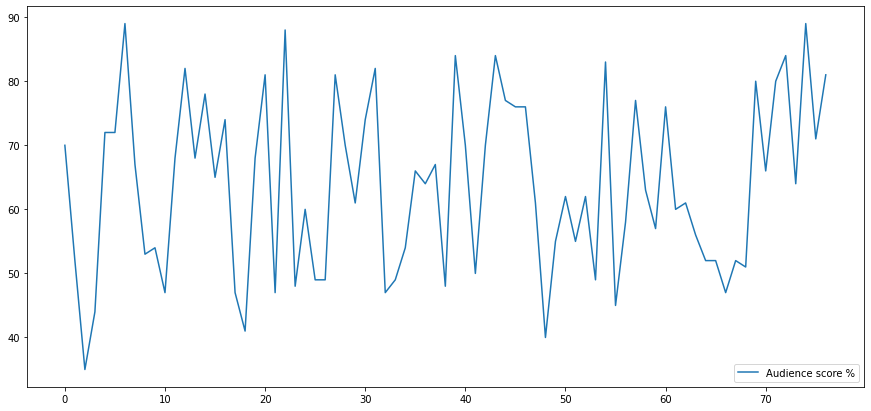

In [286]:
#Visualizing Data
df.plot(y='Audience score %',figsize=(15, 7))

In [287]:
#Algorithm Implementation
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import numpy as np

x = df['Rotten Tomatoes %']
y = df['Audience score %']

x = np.array(x)
y = np.array(y)

x = x.reshape(-1,1)
y = y.reshape(-1,1)

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3)

model = LinearRegression()
model.fit(x_train,y_train)

pred = model.predict(x_test)

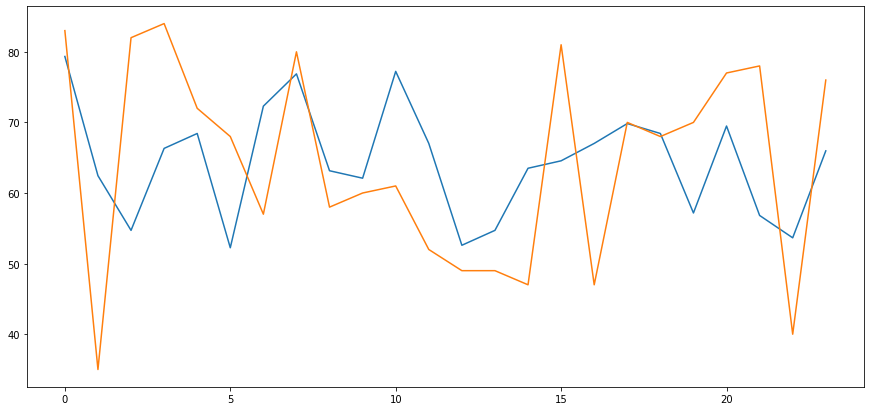

In [288]:
#Plotting Final Graphs
import matplotlib.pyplot as plt

f = plt.figure()
f.set_figwidth(15)
f.set_figheight(7)
plt.plot(pred)
plt.plot(y_test)

In [289]:
#Root Mean Square Value
rms = np.sqrt(np.mean(np.power((y_test-pred),2)))
rms

14.135008629590864